<h1 style='text-align: center;'> Mercedes Benz Car Price Prediction Notebook </h1>

---

Check **More features of this Project**
---

1. [Streamlit Application](https://mbcpp-app.herokuapp.com/)

2. [Excel Dashboard](https://github.com/Wyverical/Mercedes-Car-Model-Analysis/tree/main/Analysis%20using%20Excel)

3. [Tableau Dashboard](https://github.com/Wyverical/Mercedes-Car-Model-Analysis/tree/main/Analysis%20in%20Tableau)

4. [Notebook for Detailed Analysis](https://github.com/Wyverical/Mercedes-Car-Model-Analysis/tree/main/Exploratory%20Data%20Analysis)

## **Step 1:** Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset 

In [2]:
data_path = '/content/merc.csv'
df = pd.read_csv(data_path)
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

## Data Cleaning Process


In [3]:
df.info() #comprehend the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13115 entries, 0 to 13114
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         13115 non-null  object 
 1   year          13115 non-null  int64  
 2   price         13115 non-null  int64  
 3   transmission  13115 non-null  object 
 4   mileage       13115 non-null  int64  
 5   fuelType      13115 non-null  object 
 6   tax           13115 non-null  int64  
 7   mpg           13115 non-null  float64
 8   engineSize    13115 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 922.3+ KB


In [4]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [5]:
#This code snippet determines the unique characters in the dataset
for i in df:
  print(i)
  print(df[i].unique())
  print('-----------------------------------')

model
[' A Class' ' B Class' ' C Class' ' CL Class' ' CLA Class' ' CLC Class'
 ' CLK' ' CLS Class' ' E Class' ' G Class' ' GL Class' ' GLA Class'
 ' GLB Class' ' GLC Class' ' GLE Class' ' GLS Class' ' M Class' ' R Class'
 ' S Class' ' SL CLASS' ' SLK' ' V Class' ' X-CLASS']
-----------------------------------
year
[2020 2019 2017 2006 2011 2013 2018 2014 2016 2015 2007 2012 2003 2010
 2009 2008 2005 2002 2004 2001 1970 1998 1999 1997 2000]
-----------------------------------
price
[32980 26980 28128 ... 28945 36790 28675]
-----------------------------------
transmission
['Automatic' 'Manual' 'Semi-Auto' 'Other']
-----------------------------------
mileage
[  606  1000  2563 ...  2746 15270 23219]
-----------------------------------
fuelType
['Petrol' 'Diesel' 'Hybrid' 'Other']
-----------------------------------
tax
[145  20 150 160  30 200 165 125   0 240 205 140 325 135 115 195 235 300
 555 570 260 580 305 265 230 565 210 290 330 190 315  10 220 185 540 270
 255 280 250]
------------

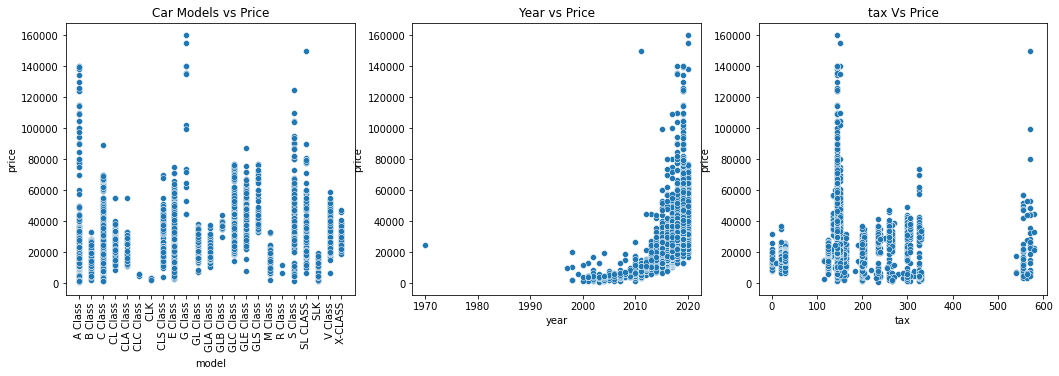

In [27]:
plt.figure(figsize=(30,5))

plt.subplot(1,5,1)
sns.scatterplot(x=df['model'], y=df['price']);
plt.title('Car Models vs Price');
plt.xticks(rotation=90)

plt.subplot(1,5,2)
sns.scatterplot(x=df['year'], y=df['price']);
plt.title('Year vs Price');

plt.subplot(1,5,3)
sns.scatterplot(x=df['tax'], y=df['price']);
plt.title('tax Vs Price');

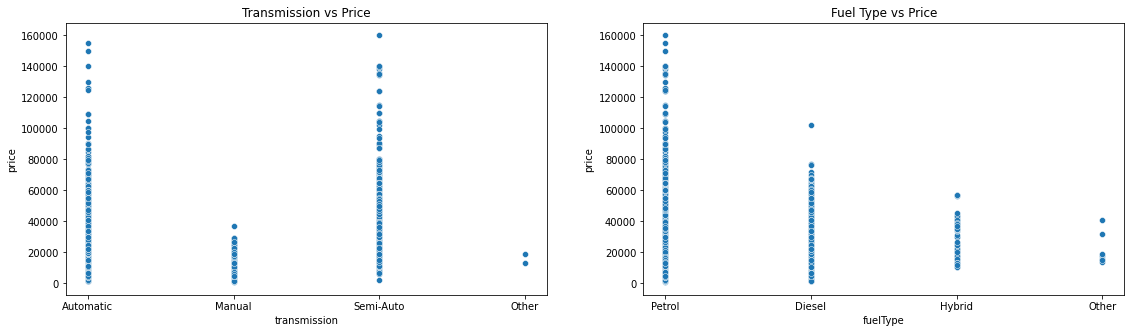

In [31]:
plt.figure(figsize=(50,5))
plt.subplot(1,5,4)
sns.scatterplot(x=df['transmission'], y=df['price']);
plt.title('Transmission vs Price');

plt.subplot(1,5,5)
sns.scatterplot(x=df['fuelType'], y=df['price']);
plt.title('Fuel Type vs Price');

## Feature Engineering

In [32]:
df['models'] = df['model'].str.strip() #wrap text of model colums
df = df.drop('model', axis = 'columns')
df

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,models
0,2020,32980,Automatic,606,Petrol,145,35.8,2.0,A Class
1,2020,26980,Automatic,1000,Diesel,145,62.8,1.5,A Class
2,2020,28128,Automatic,2563,Petrol,145,47.9,1.3,A Class
3,2019,23184,Manual,1173,Petrol,145,44.8,1.3,A Class
4,2017,15787,Automatic,24092,Diesel,20,70.6,2.1,A Class
...,...,...,...,...,...,...,...,...,...
13110,2018,27995,Automatic,21000,Diesel,260,35.8,2.3,X-CLASS
13111,2019,40990,Automatic,22000,Diesel,260,31.4,3.0,X-CLASS
13112,2017,24990,Automatic,23219,Diesel,140,35.8,2.3,X-CLASS
13113,2018,21990,Automatic,53000,Diesel,260,35.8,2.3,X-CLASS


### Encoding and Transformation of Data

In [33]:
# Apply one-hot encoder to transmission and fuelType features


OH_encoder = OneHotEncoder(sparse=False)
encode_data = pd.DataFrame(OH_encoder.fit_transform(df[['transmission', 'fuelType']]))
encode_data
encode_data.columns = ['Automatic', 'Manual', 'Other', 'Semi-Auto', 'Diesel', 'Hybrid', 'Other', 'Petrol']

merc_data = pd.concat([df, encode_data], axis=1)
merc_data


,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,models,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2020,32980,Automatic,606,Petrol,145,35.8,2.0,A Class,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020,26980,Automatic,1000,Diesel,145,62.8,1.5,A Class,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020,28128,Automatic,2563,Petrol,145,47.9,1.3,A Class,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019,23184,Manual,1173,Petrol,145,44.8,1.3,A Class,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017,15787,Automatic,24092,Diesel,20,70.6,2.1,A Class,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13110,2018,27995,Automatic,21000,Diesel,260,35.8,2.3,X-CLASS,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13111,2019,40990,Automatic,22000,Diesel,260,31.4,3.0,X-CLASS,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13112,2017,24990,Automatic,23219,Diesel,140,35.8,2.3,X-CLASS,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
13113,2018,21990,Automatic,53000,Diesel,260,35.8,2.3,X-CLASS,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Keep Essential Columns

In [34]:
df1 = merc_data.drop(['transmission', 'fuelType', 'models'], axis = 'columns')
df1.head()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol
0,2020,32980,606,145,35.8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2020,26980,1000,145,62.8,1.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2020,28128,2563,145,47.9,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2019,23184,1173,145,44.8,1.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2017,15787,24092,20,70.6,2.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


## Transform Data 

In [35]:
df2 = pd.get_dummies(df.models)
df3 = pd.concat([df1, df2], axis=1)
df3.head()

,year,price,mileage,tax,mpg,engineSize,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol,A Class,B Class,C Class,CL Class,CLA Class,CLC Class,CLK,CLS Class,E Class,G Class,GL Class,GLA Class,GLB Class,GLC Class,GLE Class,GLS Class,M Class,R Class,S Class,SL CLASS,SLK,V Class,X-CLASS
0,2020,32980,606,145,35.8,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020,26980,1000,145,62.8,1.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020,28128,2563,145,47.9,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,23184,1173,145,44.8,1.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,15787,24092,20,70.6,2.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
X = df3.drop(['price', 'tax' , 'mpg', 'mileage'], axis='columns')
X.head()

,year,engineSize,Automatic,Manual,Other,Semi-Auto,Diesel,Hybrid,Other,Petrol,A Class,B Class,C Class,CL Class,CLA Class,CLC Class,CLK,CLS Class,E Class,G Class,GL Class,GLA Class,GLB Class,GLC Class,GLE Class,GLS Class,M Class,R Class,S Class,SL CLASS,SLK,V Class,X-CLASS
0,2020,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2020,1.5,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2020,1.3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,1.3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2017,2.1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Tranning And Development of Data Model

In [37]:
X.columns

Index(['year', 'engineSize', 'Automatic', 'Manual', 'Other', 'Semi-Auto',
       'Diesel', 'Hybrid', 'Other', 'Petrol', 'A Class', 'B Class', 'C Class',
       'CL Class', 'CLA Class', 'CLC Class', 'CLK', 'CLS Class', 'E Class',
       'G Class', 'GL Class', 'GLA Class', 'GLB Class', 'GLC Class',
       'GLE Class', 'GLS Class', 'M Class', 'R Class', 'S Class', 'SL CLASS',
       'SLK', 'V Class', 'X-CLASS'],
      dtype='object')

In [38]:
y = df3.price

## Train and test Dataset

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=0)

## Evaluation of Decision Tree Regression 

In [40]:
decision_tree = DecisionTreeRegressor()
decision_tree.fit(X_train.values, y_train.values)
decision_tree.score(X_test.values, y_test.values )

0.90497922277533

## Evaluation of Random Forest Classifie 

In [41]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train.values, y_train.values)
clf.score(X_test.values, y_test.values )

0.02210927573062262

## Evaluation of LinearRegression 

In [42]:
lr_clf = LinearRegression()
lr_clf.fit(X_train.values, y_train.values)
lr_clf.score(X_test.values, y_test.values)

0.7321830932096013

## Evaluation of GaussianNB 

In [43]:
from sklearn.naive_bayes import GaussianNB
gaus = GaussianNB()
gaus.fit(X_train.values, y_train.values)
gaus.score(X_test.values, y_test.values )

0.0055908513341804324

## Absolute Mean error for Decision Tree Regression

In [44]:
# Select the target variable and predictors
y = df3['price']
X = df3.drop(['price', 'tax' , 'mpg', 'mileage'], axis='columns')

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=0)

model = DecisionTreeRegressor(random_state=0)
model.fit(X_train, y_train)
preds = model.predict(X_valid)
mae = mean_absolute_error(y_valid, preds)
mae

2392.616236983732

# Results and Predict Price for appropriate Models

In [45]:
def predict_price(model, year, engineSize, transmission, fuel):

  model_index = np.where(X.columns==model)[0][0]

  transmission_index = np.where(X.columns==transmission)[0][0]

  fuel_index = np.where(X.columns == fuel)[0][0]



  x = np.zeros(len(X.columns))
  x[0] = year
  x[1] = engineSize
  if transmission_index >= 0:
    x[transmission_index] = 1
  if fuel_index >= 0:
    x[fuel_index] = 5
  if model_index >= 0:
    x[model_index] = 9
    
  return decision_tree.predict([x])[0]

predict_price('A Class', 2020, 1.5, 'Automatic', 'Petrol')

27597.333333333332

## Convert prediction into Pickle file

In [46]:
import pickle
with open('mpprediction.pkl','wb') as f:
    pickle.dump(decision_tree,f)

## Convert prediction into JSON file

In [47]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))